# Introduction to geopandas
GeoPandas is a Python library that extends the pandas library by adding support for geospatial data. In this lesson we will introduce the geopandas library to work with vector data. We will also make our first map.

In [2]:
# this is the library we will explore
import geopandas as gpd

#will use for making map
import matplotlib.pyplot as plt


## Data

We will use simplified data about wildpig sightings in CA. Data is from Global Biodiversity Information Facility (GBIF).

Read in the shapefile using `geopandas` function `gpd.read_file()`

In [4]:
# read in data
pigs = gpd.read_file('data/gbif_sus_scroga_california/gbif_sus_scroga_california.shp')

pigs.head()

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


## `Geoseries` and `GeoDataFrame`

Core data structure of GeoPandas is `geopandas.GeoDataFrame`
 `geopandas.GeoDataFrame`= think of it as a `pandas.Dataframe` with a dedicated geometry column

The geometry column in tge `gpd.GeoDataFrame` holds the geometry (point, polygon, etc) of each spatial feature. This column is of type `geopandas.GeoSeries`.

The other non-geometry columns in the geodataframe are our usual `pd.Series` type

In [5]:
# type of pigs dataframe 
print(type(pigs))
# type of geometry column
print(type(pigs.geometry))
#type of gbifID column
print(type(pigs.gbifID))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


The new data type pf the geometry column is refelcted in the `dtypes`

In [6]:
# check the data type of the columns
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

## Geometric Information

Two other important attributes of a `gpd.GeoDataFrame` are uts coordinate reference system (CRS) and its extent. 

Think of the CRS as instructions to locate each feature on the surface of the Earth. 

We can access the CRS of the geo-dataframe using the `crs` attribute:

In [7]:
#access CRS
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The **extent** of the geo-dataframe is the bounding box covering all of the features in our geodataframe. 

We access information to make the extent of a geo-dataframe using the `total_bounds` attribute.

In [8]:
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

## Data wrangling

Geopandas is built on top of `pandas`, so (almost) everything we have learned about wrangling pandas data, still applies here.

**Example**

We only want to use recent data for the wild pig observations.


In [10]:
# What years do we have?
pigs.year.value_counts().sort_index()

1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: year, Length: 61, dtype: int64

We can use our usual data selection.

In [11]:
# select data from 2020 onwards
pigs_recent = pigs[pigs.year >= 2020]

#print length of original dataframe
print(len(pigs))

#print length of subset
print(len(pigs_recent))

pigs_recent.head()

1046
606


,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
61,4424675671,Sus scrofa,California,NaN,23.0,9.0,2023.0,iNaturalist,Observations,186357811,madamcoyote,POINT (-124.28580 40.32482)
62,4424357894,Sus scrofa,California,NaN,6.0,10.0,2023.0,iNaturalist,Observations,186474363,skullroy,POINT (-120.82724 35.34895)
63,4424357588,Sus scrofa,California,NaN,5.0,10.0,2023.0,iNaturalist,Observations,186333783,Brian Ahern,POINT (-121.71683 37.34602)
64,4424288359,Sus scrofa,California,NaN,7.0,10.0,2023.0,iNaturalist,Observations,186602594,Steph,POINT (-119.62832 37.28900)
65,4424285723,Sus scrofa,California,NaN,5.0,10.0,2023.0,iNaturalist,Observations,186479844,natleecrockett,POINT (-121.77317 37.50025)


## Plotting

### `plot()`
`gpd.GeoDataFrame` has a `plot()` method that we can call directly to make a quick view of the data.

The geospatial information will be automatically used to make the axes of the plot. 

**Example**
Quick plot of recent wild pig sightings


<AxesSubplot:>

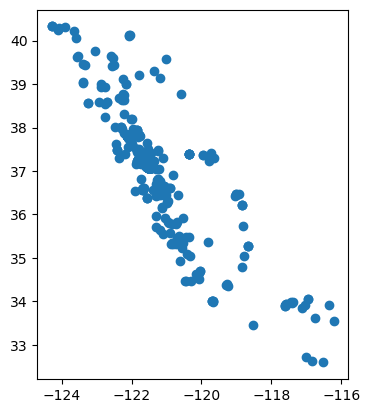

In [12]:
pigs_recent.plot()

### `matplotlib` `fig` and `ax`

We use `matplotlib` to make more complex, customized graphs. In particular, maps.

We can interact with `matplotlib` via its `pyplot` interface, which we imported as 

```python
import matplotlib.pyplot as plt
```

Matplotlib graphs the data in a **figure** which can have one or more **axes**.
The axis is *only* the area specified by the x-y axis and what is plotted in it.
To initialize a blank figure:

1. Initialize a blank figure and axes by calling `pyplot`'s `subplots()` function , and 
2. show the graph using `plt.show()`

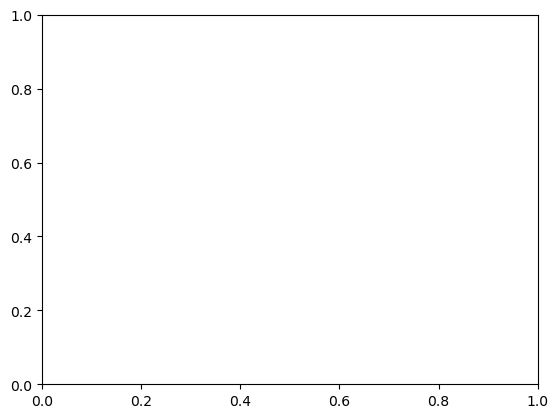

In [14]:
# make a blank figure (fig) and an empty axis (ax)
fig, ax = plt.subplots()

#display figure
plt.show()

## Adding a layer

When using `matplotlib`, it can be useful to think of making a plot, adding layers to an axis.

The general syntax to plot a dataframe `df` is :

```python
fig, ax = plt.subplots()

#plot df on the ax axis 
df.plot(ax = ax,
       ...) #other arguments for plot function 
#display figure
plt.show()
```

**Example**

The first layer we want to add to our axis is the `pigs_recent` point data.

<function matplotlib.pyplot.show(close=None, block=None)>

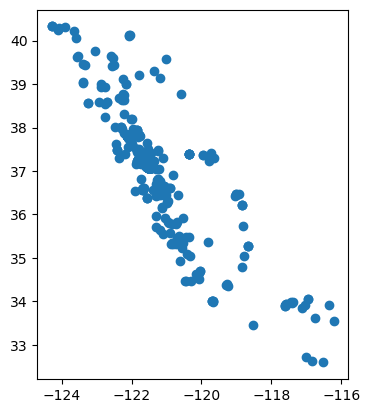

In [15]:
# make a new figure and axis
fig, ax = plt.subplots()

#add pigs point plot to our figure's axis
pigs_recent.plot(ax = ax)

#display the figure
plt.show

### Customization 

Matplotlib allows for a lot of customization. Some can be done directly in the `plot()` function (like we did with pandas),
while others are done by updating attributes from the axis `ax`.

Some basic customization of our pigs data:

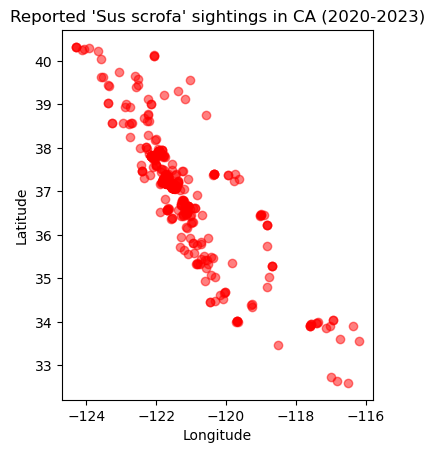

In [18]:
# initialize an empty figure
fig, ax = plt.subplots()
# add data to axis
#notice customizatoin happens as argyments in plot()
pigs_recent.plot(ax = ax,
                alpha = 0.5,
                color = 'red')
#update axis
#customization apart from the data plotting
ax.set_title("Reported 'Sus scrofa' sightings in CA (2020-2023)")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

#display figure
plt.show()

## Exercise

1. Open the CA boundary shapefile and store as a ca_boundary variable. How many features does it have?
2. Add it to the pig sightings graph so that the CA boundary appears behind the points. 

Text(132.699971804565, 0.5, 'Latitude')

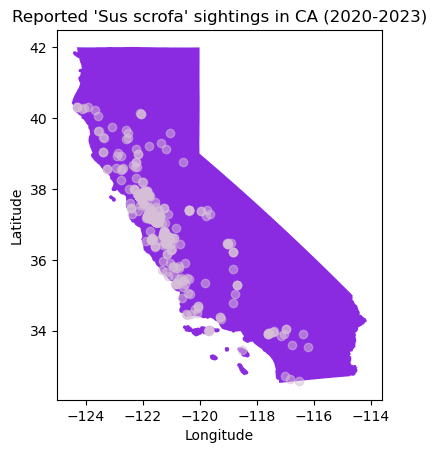

In [29]:
#reading in the ca boundary shapefile
ca_boundary = gpd.read_file('data/ca-boundary/ca-boundary.shp')

# initialize an empty figure
fig, ax = plt.subplots()
ca_boundary.plot(ax=ax,
                color = 'blueviolet')
pigs_recent.plot(ax = ax,
                alpha = 0.5,
                color = 'thistle')
ax.set_title("Reported 'Sus scrofa' sightings in CA (2020-2023)")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

In [30]:
#geom_type will show what kind of vector data is stored in each feature of the geometry column
ca_boundary.geom_type

0    MultiPolygon
dtype: object

In [31]:
pigs.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1041    Point
1042    Point
1043    Point
1044    Point
1045    Point
Length: 1046, dtype: object